<a href="https://colab.research.google.com/github/KaranvirJassar/Classification-of-Seizure-EEG-data/blob/main/Seizure_detection_using_CNN_and_cwt.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [58]:
data = pd.read_csv('/Epileptic Seizure Recognition.csv')

# New Section

In [59]:
import os
import math
import imblearn
import logging
import warnings
import statistics
import numpy as np
import pandas as pd
import seaborn as sns
from collections import Counter
from sklearn import svm
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import roc_auc_score , accuracy_score , precision_score, recall_score ,confusion_matrix
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from numpy import genfromtxt
from mpl_toolkits.mplot3d import Axes3D
from imblearn.combine import SMOTEENN
%matplotlib inline




from warnings import simplefilter
simplefilter(action='ignore', category=FutureWarning)
warnings.filterwarnings('ignore')


# New Section

In [60]:
data.head()

,Unnamed,X1,X2,X3,X4,X5,X6,X7,X8,X9,...,X170,X171,X172,X173,X174,X175,X176,X177,X178,y
0,X21.V1.791,135,190,229,223,192,125,55,-9,-33,...,-17,-15,-31,-77,-103,-127,-116,-83,-51,4
1,X15.V1.924,386,382,356,331,320,315,307,272,244,...,164,150,146,152,157,156,154,143,129,1
2,X8.V1.1,-32,-39,-47,-37,-32,-36,-57,-73,-85,...,57,64,48,19,-12,-30,-35,-35,-36,5
3,X16.V1.60,-105,-101,-96,-92,-89,-95,-102,-100,-87,...,-82,-81,-80,-77,-85,-77,-72,-69,-65,5
4,X20.V1.54,-9,-65,-98,-102,-78,-48,-16,0,-21,...,4,2,-12,-32,-41,-65,-83,-89,-73,5


In [61]:
data.describe()

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,...,X170,X171,X172,X173,X174,X175,X176,X177,X178,y
count,11500.000000,11500.000000,11500.000000,11500.000000,11500.000000,11500.000000,11500.000000,11500.00000,11500.00000,11500.000000,...,11500.000000,11500.000000,11500.000000,11500.000000,11500.000000,11500.000000,11500.000000,11500.000000,11500.000000,11500.000000
mean,-11.581391,-10.911565,-10.187130,-9.143043,-8.009739,-7.003478,-6.502087,-6.68713,-6.55800,-6.168435,...,-10.145739,-11.630348,-12.943478,-13.668870,-13.363304,-13.045043,-12.705130,-12.426000,-12.195652,3.000000
std,165.626284,166.059609,163.524317,161.269041,160.998007,161.328725,161.467837,162.11912,162.03336,160.436352,...,164.652883,166.149790,168.554058,168.556486,167.257290,164.241019,162.895832,162.886311,164.852015,1.414275
min,-1839.000000,-1838.000000,-1835.000000,-1845.000000,-1791.000000,-1757.000000,-1832.000000,-1778.00000,-1840.00000,-1867.000000,...,-1867.000000,-1865.000000,-1642.000000,-1723.000000,-1866.000000,-1863.000000,-1781.000000,-1727.000000,-1829.000000,1.000000
25%,-54.000000,-55.000000,-54.000000,-54.000000,-54.000000,-54.000000,-54.000000,-55.00000,-55.00000,-54.000000,...,-55.000000,-56.000000,-56.000000,-56.000000,-55.000000,-56.000000,-55.000000,-55.000000,-55.000000,2.000000
50%,-8.000000,-8.000000,-7.000000,-8.000000,-8.000000,-8.000000,-8.000000,-8.00000,-7.00000,-7.000000,...,-9.000000,-10.000000,-10.000000,-10.000000,-10.000000,-9.000000,-9.000000,-9.000000,-9.000000,3.000000
75%,34.000000,35.000000,36.000000,36.000000,35.000000,36.000000,35.000000,36.00000,36.00000,35.250000,...,34.000000,34.000000,33.000000,33.000000,34.000000,34.000000,34.000000,34.000000,34.000000,4.000000
max,1726.000000,1713.000000,1697.000000,1612.000000,1518.000000,1816.000000,2047.000000,2047.00000,2047.00000,2047.000000,...,1777.000000,1472.000000,1319.000000,1436.000000,1733.000000,1958.000000,2047.000000,2047.000000,1915.000000,5.000000


In [62]:
data.shape

(11500, 180)

In [63]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11500 entries, 0 to 11499
Columns: 180 entries, Unnamed to y
dtypes: int64(179), object(1)
memory usage: 15.8+ MB


In [64]:
data.describe(include=object)


,Unnamed
count,11500
unique,11500
top,X16.V1.210
freq,1


In [65]:
null_values = data.isnull().sum()
null_values.to_numpy()

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0])

In [66]:
data_1 = data.copy()

In [67]:

data_1.drop(['Unnamed','y'],axis=1,inplace=True)

In [68]:
data_1

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,...,X169,X170,X171,X172,X173,X174,X175,X176,X177,X178
0,135,190,229,223,192,125,55,-9,-33,-38,...,8,-17,-15,-31,-77,-103,-127,-116,-83,-51
1,386,382,356,331,320,315,307,272,244,232,...,168,164,150,146,152,157,156,154,143,129
2,-32,-39,-47,-37,-32,-36,-57,-73,-85,-94,...,29,57,64,48,19,-12,-30,-35,-35,-36
3,-105,-101,-96,-92,-89,-95,-102,-100,-87,-79,...,-80,-82,-81,-80,-77,-85,-77,-72,-69,-65
4,-9,-65,-98,-102,-78,-48,-16,0,-21,-59,...,10,4,2,-12,-32,-41,-65,-83,-89,-73
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11495,-22,-22,-23,-26,-36,-42,-45,-42,-45,-49,...,20,15,16,12,5,-1,-18,-37,-47,-48
11496,-47,-11,28,77,141,211,246,240,193,136,...,-94,-65,-33,-7,14,27,48,77,117,170
11497,14,6,-13,-16,10,26,27,-9,4,14,...,-42,-65,-48,-61,-62,-67,-30,-2,-1,-8
11498,-40,-25,-9,-12,-2,12,7,19,22,29,...,114,121,135,148,143,116,86,68,59,55


In [69]:
data['y'].value_counts()

,count
y,
4,2300
1,2300
5,2300
2,2300
3,2300


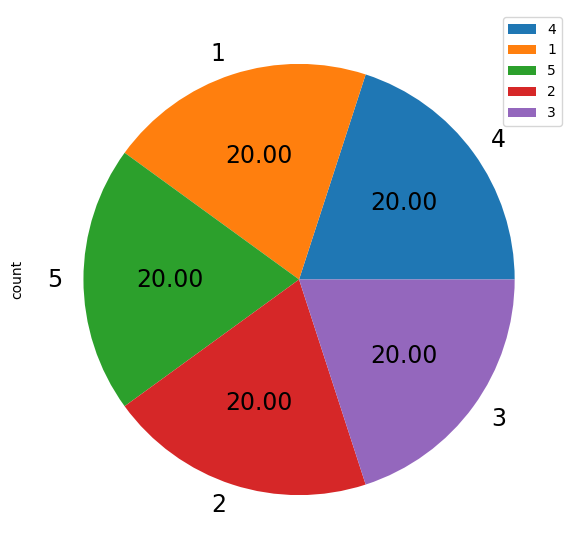

In [70]:
#visualizing the only categorical column present in the dataset.
values = data['y'].value_counts()
plt.figure(figsize=(7,7))
values.plot(kind='pie',fontsize=17, autopct='%.2f')
plt.legend(loc="best")
plt.show()
#it means all the categorical values in our dataset contains the equal amoung of balance.

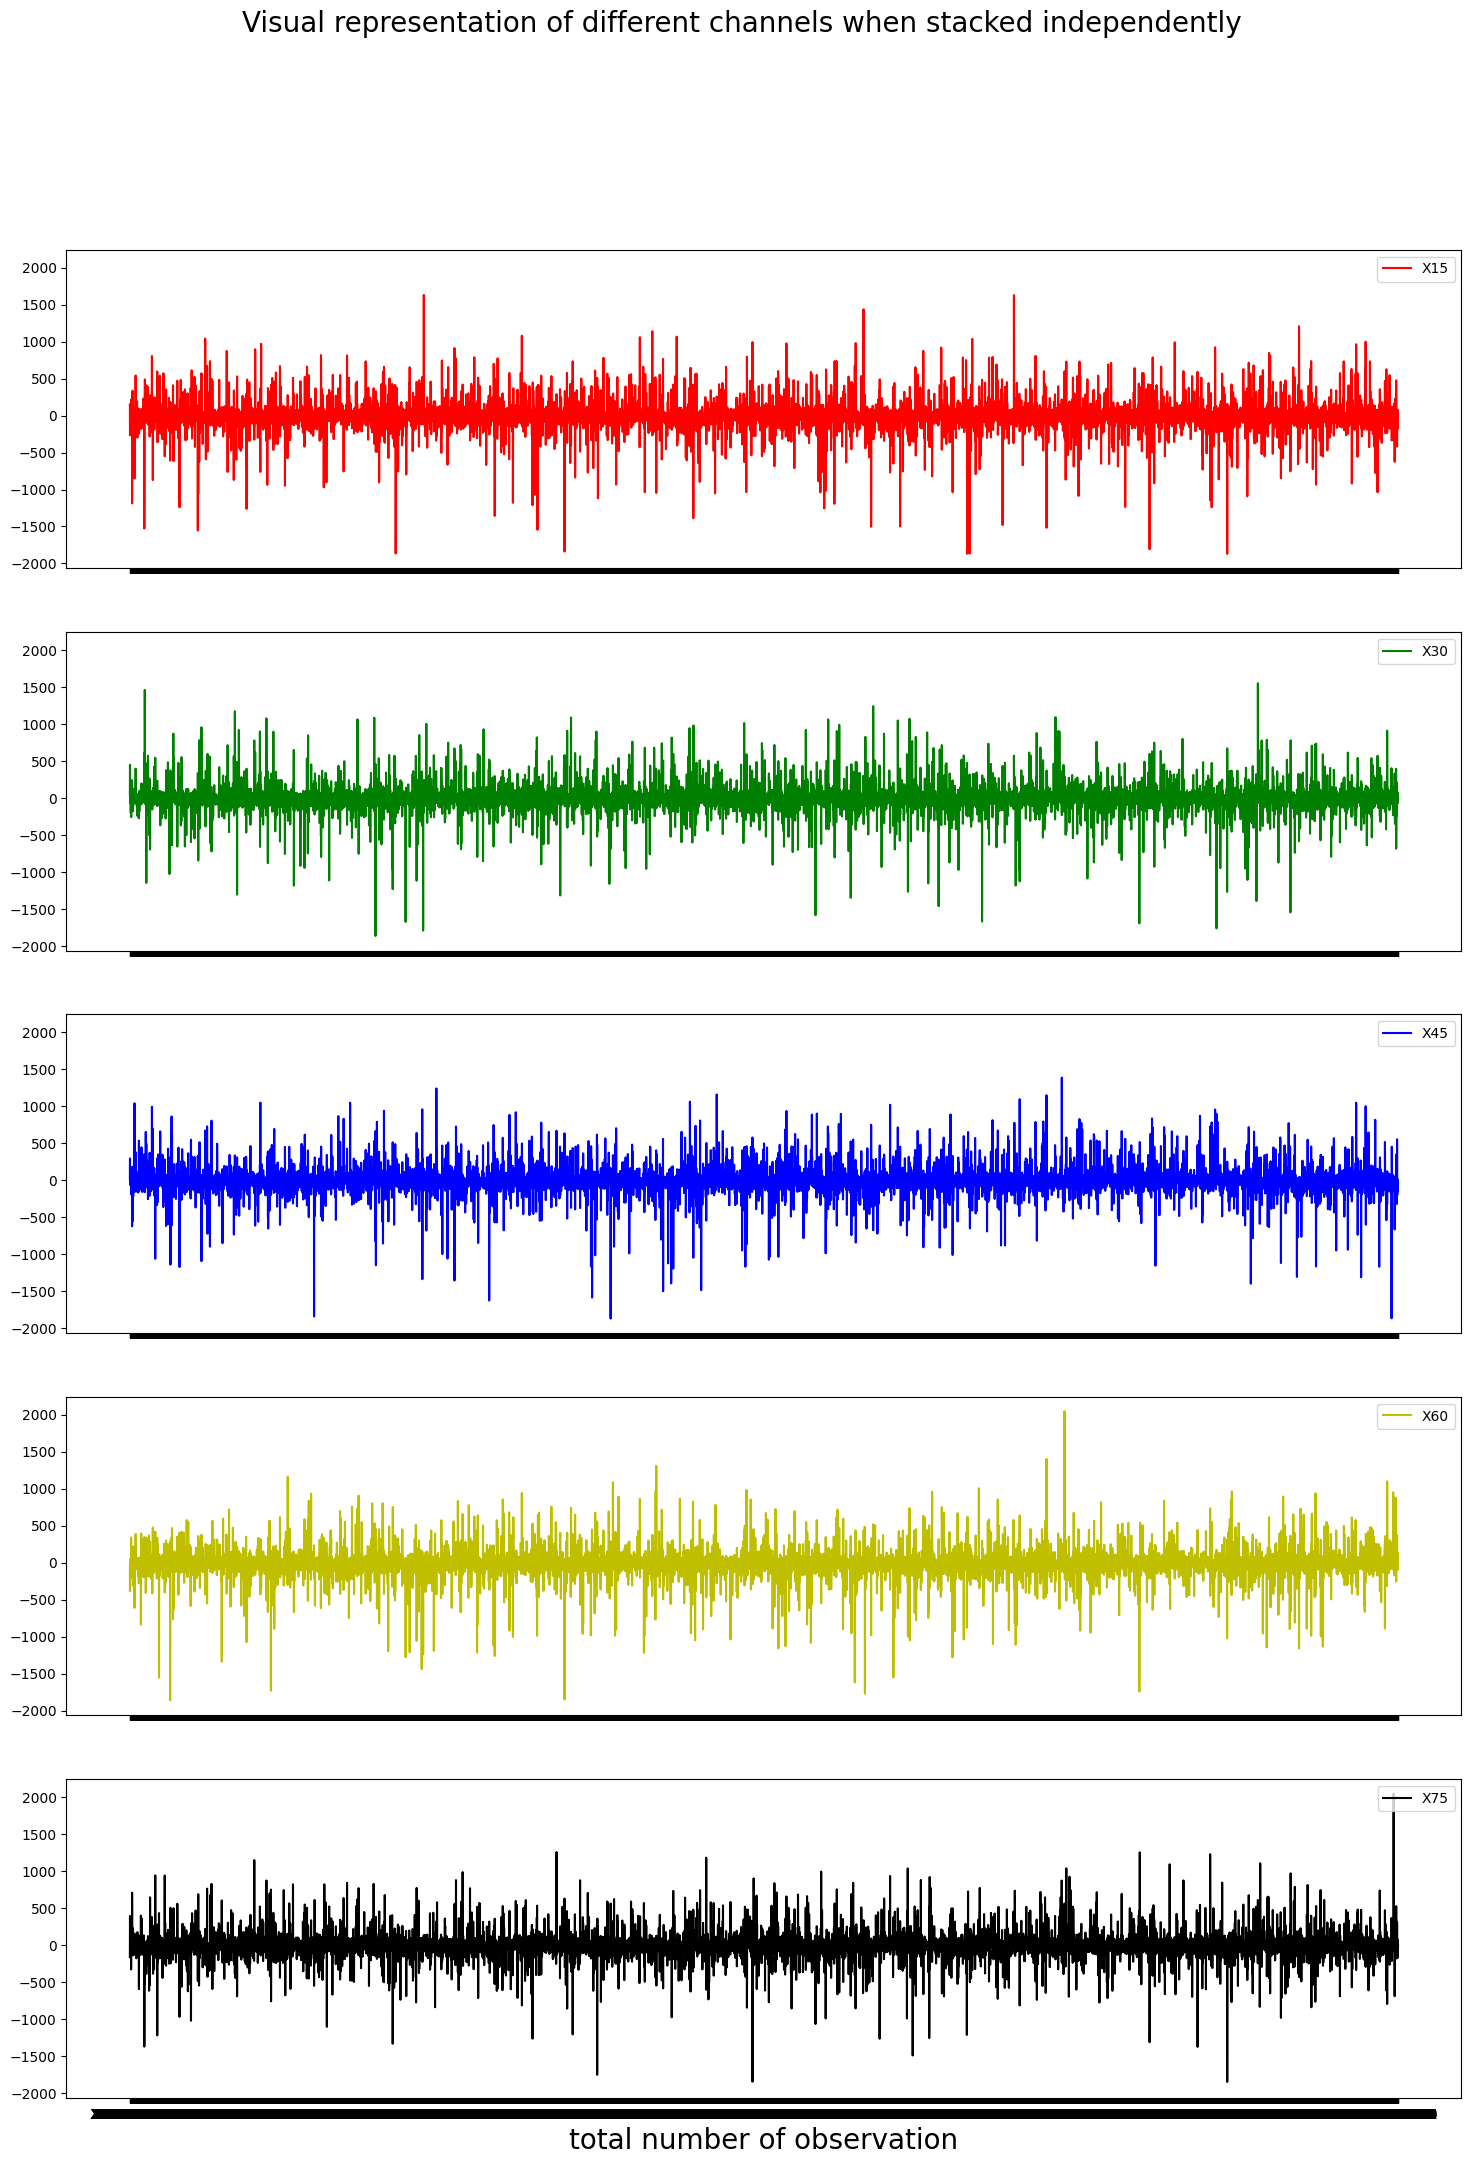

In [71]:
# plot these features in the same graph with stack plot
fig, axs = plt.subplots(5, sharex=True, sharey=True)
fig.set_size_inches(18, 24)
labels = ["X15","X30","X45","X60","X75"]
colors = ["r","g","b",'y',"k"]
fig.suptitle('Visual representation of different channels when stacked independently', fontsize = 20)
# loop over axes
for i,ax in enumerate(axs):
  axs[i].plot(data.iloc[:,0],data[labels[i]],color=colors[i],label=labels[i])
  axs[i].legend(loc="upper right")

plt.xlabel('total number of observation', fontsize = 20)
plt.show()

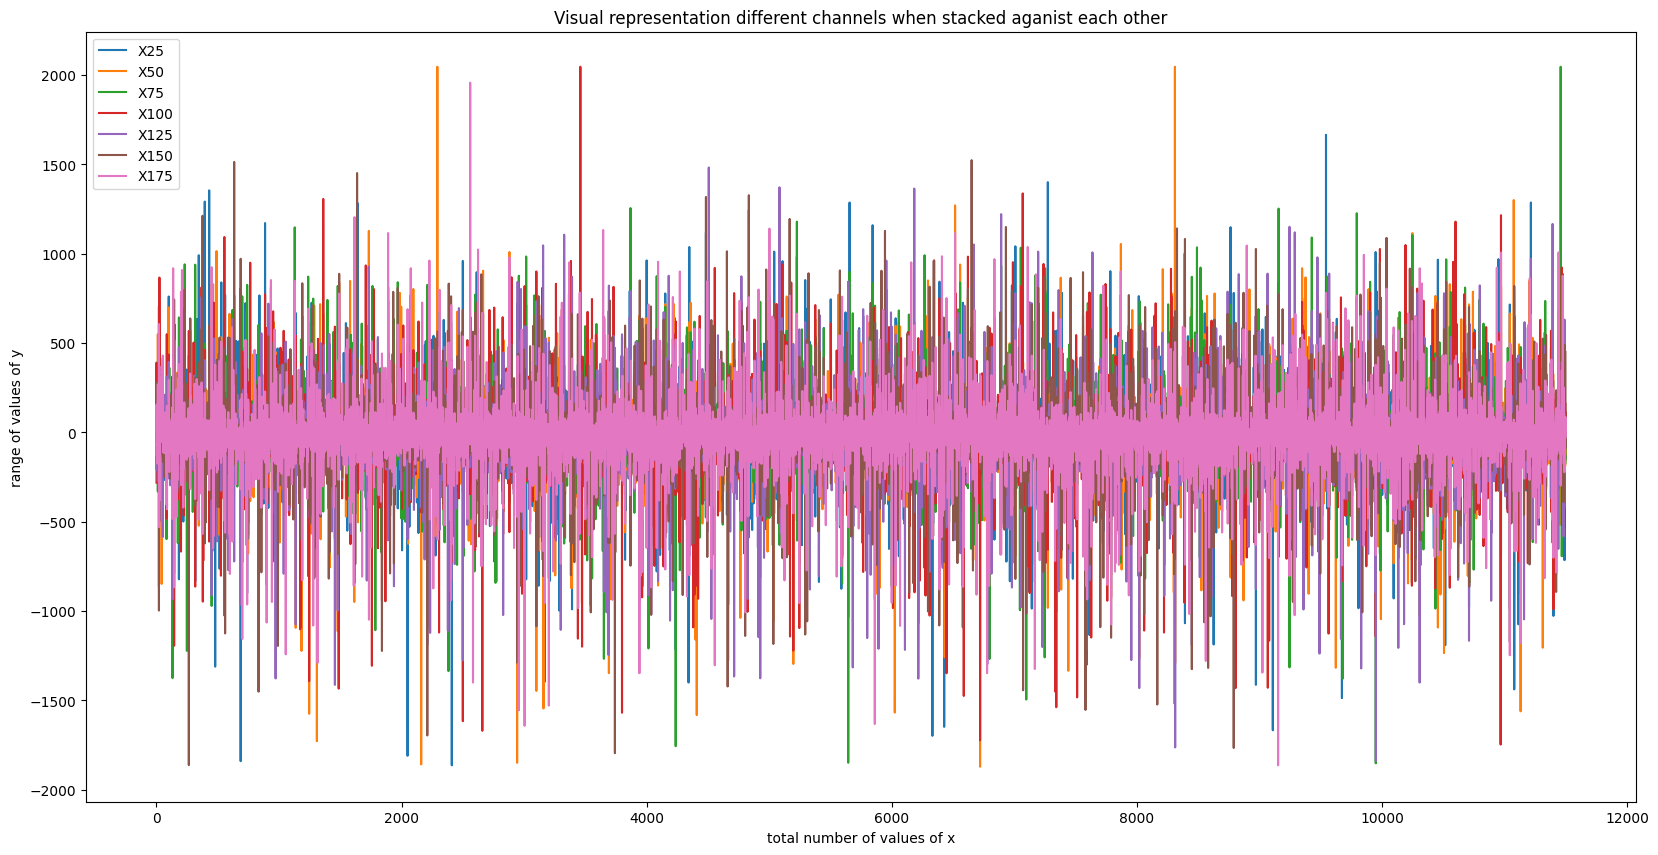

In [72]:
#plt.figure(figsize=(10,10))
#this can help of provide us the general idea of how the waves are behaving
#fig, axs = plt.subplots(1, sharex=True, sharey=True)
plt.rcParams["figure.figsize"] = (20, 10)
data.loc[:,::25].plot()
plt.title("Visual representation different channels when stacked aganist each other")
plt.xlabel("total number of values of x")
plt.ylabel("range of values of y")
plt.show()

In [73]:
data_2 = data.drop(["Unnamed"],axis=1).copy()

In [74]:
data_2["Output"]= data_2.y == 0

In [75]:
data_2["Output"] = data_2["Output"].astype(int)

In [76]:
data_2.y.value_counts()

,count
y,
4,2300
1,2300
5,2300
2,2300
3,2300


In [77]:
data_2['y'] = data_2['y'].replace([2,3,4,5],0)

In [78]:
data_2.y.value_counts()

,count
y,
0,9200
1,2300


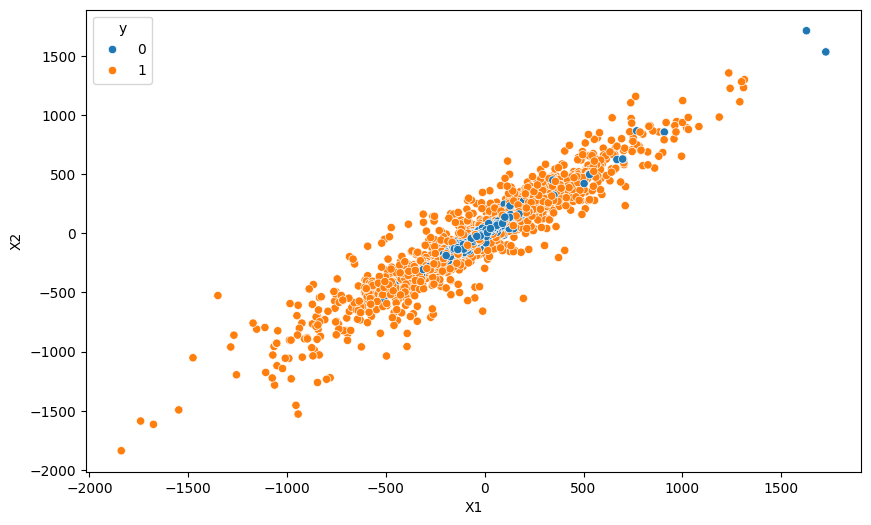

In [79]:
plt.figure(figsize=(10,6),dpi=100)
sns.despine(left=True)
sns.scatterplot(x='X1', y='X2', hue = 'y', data=data_2)
plt.show()

In [80]:
data_2.head()

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,...,X171,X172,X173,X174,X175,X176,X177,X178,y,Output
0,135,190,229,223,192,125,55,-9,-33,-38,...,-15,-31,-77,-103,-127,-116,-83,-51,0,0
1,386,382,356,331,320,315,307,272,244,232,...,150,146,152,157,156,154,143,129,1,0
2,-32,-39,-47,-37,-32,-36,-57,-73,-85,-94,...,64,48,19,-12,-30,-35,-35,-36,0,0
3,-105,-101,-96,-92,-89,-95,-102,-100,-87,-79,...,-81,-80,-77,-85,-77,-72,-69,-65,0,0
4,-9,-65,-98,-102,-78,-48,-16,0,-21,-59,...,2,-12,-32,-41,-65,-83,-89,-73,0,0


In [81]:
data_2.y.value_counts()

,count
y,
0,9200
1,2300


In [82]:
X  = data_2.drop(['Output','y'], axis=1)
y = data_2['y']

In [83]:
data_2['y'] = data_2['y'].replace([2,3],3)
data_2['y'] = data_2['y'].replace([4,5],2)

In [84]:
data_2.y.value_counts()

,count
y,
0,9200
1,2300


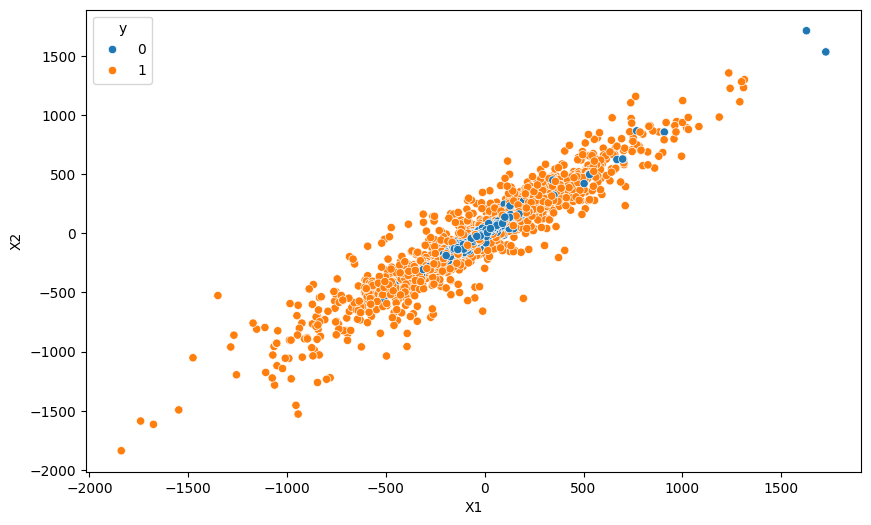

In [85]:
plt.figure(figsize=(10,6),dpi=100)
sns.despine(left=True)
sns.scatterplot(x='X1', y='X2', hue = 'y', data=data_2)
plt.show()

In [86]:
data_2.head()

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,...,X171,X172,X173,X174,X175,X176,X177,X178,y,Output
0,135,190,229,223,192,125,55,-9,-33,-38,...,-15,-31,-77,-103,-127,-116,-83,-51,0,0
1,386,382,356,331,320,315,307,272,244,232,...,150,146,152,157,156,154,143,129,1,0
2,-32,-39,-47,-37,-32,-36,-57,-73,-85,-94,...,64,48,19,-12,-30,-35,-35,-36,0,0
3,-105,-101,-96,-92,-89,-95,-102,-100,-87,-79,...,-81,-80,-77,-85,-77,-72,-69,-65,0,0
4,-9,-65,-98,-102,-78,-48,-16,0,-21,-59,...,2,-12,-32,-41,-65,-83,-89,-73,0,0


In [87]:
data_2.y.value_counts()

,count
y,
0,9200
1,2300


In [88]:
X  = data_2.drop(['Output','y'], axis=1)
y = data_2['y']

In [89]:
import pandas as pd

# Convert X and y to DataFrame and Series if they aren't already
X = pd.DataFrame(X)
y = pd.Series(y)

# Remove rows where y is NaN
mask = y.notna()
X = X[mask]
y = y[mask]

# Now, you can recheck the counter and try resampling again
from collections import Counter
counter = Counter(y)
print('Before', counter)

from imblearn.combine import SMOTEENN
smenn = SMOTEENN()
X_train1, y_train1 = smenn.fit_resample(X, y)

counter = Counter(y_train1)
print('After', counter)


Before Counter({0: 9200, 1: 2300})
After Counter({0: 9077, 1: 9070})


In [90]:
#so we will start with dividing it into two parts/because with this method we cannot divide it into three parts
X_train, X_test, y_train, y_test = train_test_split(X_train1,y_train1,test_size=0.4,random_state=42)

#now we will be dividing it into further to get the validation set
X_val, X_test, y_val, y_test = train_test_split(X_test,y_test,test_size=0.5,random_state=42)

In [91]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

#now we will going to scale the dataset
X_train = scaler.fit_transform(X_train)
X_val = scaler.transform(X_val)
X_test = scaler.transform(X_test)

In [92]:
print("The shape of the training set is :{}".format(X_train.shape))
print("The shape of the testing set is :{}".format(X_test.shape))
print("The shape of the validation set is :{}".format(X_val.shape))

The shape of the training set is :(10888, 178)
The shape of the testing set is :(3630, 178)
The shape of the validation set is :(3629, 178)


In [93]:
from tensorflow.keras.layers import Dense, BatchNormalization,Dropout,LSTM,Dense,Activation,Flatten
from tensorflow.keras.models import Sequential
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.optimizers import Adam
from tensorflow.keras import regularizers
from tensorflow.keras.layers import Conv2D,MaxPooling2D,Dropout
from tensorflow.keras import callbacks

In [94]:
X_train.shape

(10888, 178)

In [95]:
X_train.shape

(10888, 178)

In [96]:
from keras.models import Sequential
from keras.layers import Conv1D, MaxPooling1D, Flatten, Dense, Dropout

# Initialising the CNN model
model = Sequential()

# Reshape the input data for the CNN (assuming your input shape is (batch_size, 178))
input_shape = (178, 1)  # assuming you have 178 features

# Adding the first convolutional layer
model.add(Conv1D(filters=32, kernel_size=3, activation='relu', input_shape=input_shape))

# Adding a max pooling layer
model.add(MaxPooling1D(pool_size=2))

# Adding another convolutional layer
model.add(Conv1D(filters=64, kernel_size=3, activation='relu'))

# Adding another convolutional layer
model.add(Conv1D(filters=32, kernel_size=3, activation='relu'))

# Adding a max pooling layer
model.add(MaxPooling1D(pool_size=2))

# Adding a dropout layer
model.add(Dropout(0.25))

# Flattening the layer before passing it to the fully connected layers
model.add(Flatten())

# Adding a fully connected layer
model.add(Dense(units=32, activation='relu'))

# Adding a fully connected layer
model.add(Dense(units=16, activation='relu'))

# Adding a dropout layer
model.add(Dropout(0.5))

# Output layer
model.add(Dense(units=1, activation='relu'))

# Printing the summary of the model
model.summary()


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv1d (Conv1D)                 │ (None, 176, 32)        │           128 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d (MaxPooling1D)    │ (None, 88, 32)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_1 (Conv1D)               │ (None, 86, 64)         │         6,208 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_2 (Conv1D)               │ (None, 84, 32)         │         6,176 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d_1 (MaxPooling1D)  │ (None, 42, 32)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 42, 32)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 1344)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 32)             │        43,040 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 16)             │           528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 16)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │            17 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 56,097 (219.13 KB)

 Trainable params: 56,097 (219.13 KB)

 Non-trainable params: 0 (0.00 B)

In [97]:
from keras.callbacks import EarlyStopping
from keras.models import Sequential
from keras.layers import Conv1D, MaxPooling1D, Flatten, Dense, Dropout
from sklearn.model_selection import train_test_split

# Assuming you have your X_train and y_train data ready

# Reshape the input data for the CNN (assuming your input shape is (batch_size, 178))
input_shape = (178, 1)  # assuming you have 178 features

# Initialising the CNN model
model = Sequential()

# Adding the first convolutional layer
model.add(Conv1D(filters=32, kernel_size=3, activation='relu', input_shape=input_shape))

# Adding a max pooling layer
model.add(MaxPooling1D(pool_size=2))

# Adding another convolutional layer
model.add(Conv1D(filters=64, kernel_size=3, activation='relu'))

# Adding another convolutional layer
model.add(Conv1D(filters=32, kernel_size=3, activation='relu'))

# Adding a max pooling layer
model.add(MaxPooling1D(pool_size=2))

# Adding a dropout layer
model.add(Dropout(0.25))

# Flattening the layer before passing it to the fully connected layers
model.add(Flatten())

# Adding a fully connected layer
model.add(Dense(units=32, activation='relu'))

# Adding a fully connected layer
model.add(Dense(units=16, activation='relu'))

# Adding a dropout layer
model.add(Dropout(0.5))

# Output layer
model.add(Dense(units=1, activation='sigmoid'))

# Compiling the CNN model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Defining Early Stopping
early_stopping = EarlyStopping(min_delta=0.001, patience=20, restore_best_weights=True)

# Splitting the data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

# Training the model
model_train = model.fit(X_train, y_train, batch_size=32, epochs=500, callbacks=[early_stopping], validation_data=(X_val, y_val))


Epoch 1/500
273/273 ━━━━━━━━━━━━━━━━━━━━ 4s 11ms/step - accuracy: 0.7902 - loss: 0.3919 - val_accuracy: 0.9348 - val_loss: 0.1624
Epoch 2/500
273/273 ━━━━━━━━━━━━━━━━━━━━ 3s 12ms/step - accuracy: 0.9274 - loss: 0.1875 - val_accuracy: 0.9467 - val_loss: 0.1525
Epoch 3/500
273/273 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - accuracy: 0.9363 - loss: 0.1728 - val_accuracy: 0.9435 - val_loss: 0.1580
Epoch 4/500
273/273 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - accuracy: 0.9358 - loss: 0.1597 - val_accuracy: 0.9454 - val_loss: 0.1484
Epoch 5/500
273/273 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - accuracy: 0.9444 - loss: 0.1432 - val_accuracy: 0.9532 - val_loss: 0.1259
Epoch 6/500
273/273 ━━━━━━━━━━━━━━━━━━━━ 3s 12ms/step - accuracy: 0.9507 - loss: 0.1218 - val_accuracy: 0.9596 - val_loss: 0.1252
Epoch 7/500
273/273 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - accuracy: 0.9592 - loss: 0.1005 - val_accuracy: 0.9601 - val_loss: 0.1134
Epoch 8/500
273/273 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - accuracy: 0.9661 - loss: 0.0886 - 

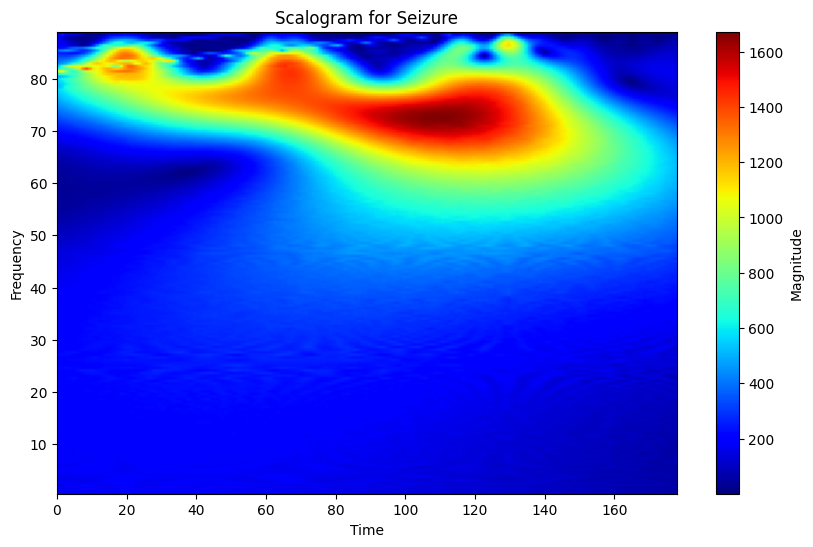

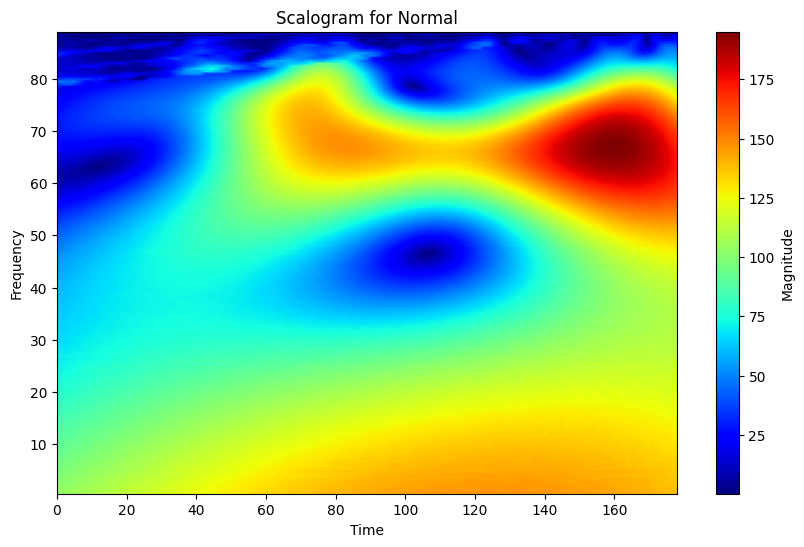

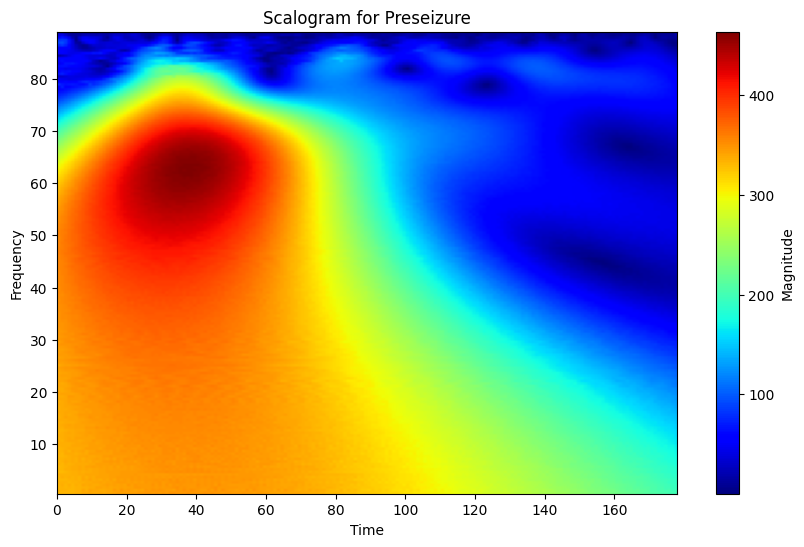

In [98]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pywt

def generate_scalogram(signal, sampling_rate, wavelet='cmor', scales=None):
    """
    Generate scalogram using Continuous Wavelet Transform (CWT).

    Parameters:
        signal (ndarray): Input signal data.
        sampling_rate (float): Sampling rate of the signal (samples per second).
        wavelet (str): Wavelet to be used for CWT. Default is 'cmor'.
        scales (array-like): Scales to be used for CWT. If None, scales are automatically determined.

    Returns:
        ndarray: CWT coefficients.
        ndarray: Frequencies corresponding to the scales.
    """
    if scales is None:
        scales = np.arange(1, len(signal) + 1)

    coeffs, frequencies = pywt.cwt(signal, scales, wavelet, sampling_period=1/sampling_rate)
    return coeffs, frequencies

def load_data_from_csv(csv_file):
    """
    Load signal data from a CSV file.

    Parameters:
        csv_file (str): Path to the CSV file containing signal data.

    Returns:
        ndarray: Signal data.
        float: Sampling rate.
        ndarray: Labels.
    """
    df = pd.read_csv("/Epileptic Seizure Recognition.csv", header=1)  # Specify the correct usage of the variable csv_file
    data = df.values
    signal = data[:, 1:-1]  # Assuming signals are all columns except the first and last
    labels = data[:, -1].astype(int)  # Ensure labels are integer type
    sampling_rate = 178  # Define the sampling rate (presumably known)
    return signal, labels, sampling_rate

csv_file = 'Epileptic Seizure Recognition.csv'  # Correct file path as a string

signal, labels, sampling_rate = load_data_from_csv(csv_file)

indices_seizure = np.where(labels == 1)[0]
indices_normal = np.where(labels == 2)[0]
indices_preseizure = np.where(labels == 3)[0]

label_mapping = {1: 'Seizure', 2: 'Normal', 3: 'Preseizure'}

for label_indices, label in zip([indices_seizure, indices_normal, indices_preseizure], [1, 2, 3]):
    if len(label_indices) > 0:
        data = signal[label_indices]
        chunk_data = data[0, :]  # Example: first row for the label
        coeffs, frequencies = generate_scalogram(chunk_data, sampling_rate)
        plt.figure(figsize=(10, 6))
        plt.imshow(np.abs(coeffs), extent=[0, len(chunk_data), min(frequencies), max(frequencies)], aspect='auto', cmap='jet')
        plt.colorbar(label='Magnitude')
        plt.title(f'Scalogram for {label_mapping[label]}')
        plt.xlabel('Time')
        plt.ylabel('Frequency')
        plt.show()
    else:
        print(f"No samples available for {label_mapping[label]}. Skipping...")


In [99]:
from keras.callbacks import EarlyStopping
from keras.models import Sequential
from keras.layers import Conv1D, MaxPooling1D, Flatten, Dense, Dropout
from sklearn.model_selection import train_test_split

# Assuming you have your X_train and y_train data ready

# Reshape the input data for the CNN (assuming your input shape is (batch_size, 178))
input_shape = (178, 1)  # assuming you have 178 features

# Initialising the CNN model
model = Sequential()

# Adding the first convolutional layer
model.add(Conv1D(filters=32, kernel_size=3, activation='relu', input_shape=input_shape))

# Adding a max pooling layer
model.add(MaxPooling1D(pool_size=2))

# Adding another convolutional layer
model.add(Conv1D(filters=64, kernel_size=3, activation='relu'))

# Adding another convolutional layer
model.add(Conv1D(filters=32, kernel_size=3, activation='relu'))

# Adding a max pooling layer
model.add(MaxPooling1D(pool_size=2))

# Adding a dropout layer
model.add(Dropout(0.25))

# Flattening the layer before passing it to the fully connected layers
model.add(Flatten())

# Adding a fully connected layer
model.add(Dense(units=32, activation='relu'))

# Adding a fully connected layer
model.add(Dense(units=16, activation='relu'))

# Adding a dropout layer
model.add(Dropout(0.5))

# Output layer
model.add(Dense(units=1, activation='sigmoid'))

# Compiling the CNN model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Defining Early Stopping
early_stopping = EarlyStopping(min_delta=0.001, patience=20, restore_best_weights=True)

# Splitting the data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

# Training the model
model_train = model.fit(X_train, y_train, batch_size=32, epochs=500, callbacks=[early_stopping], validation_data=(X_val, y_val))


Epoch 1/500
218/218 ━━━━━━━━━━━━━━━━━━━━ 4s 13ms/step - accuracy: 0.7564 - loss: 0.4408 - val_accuracy: 0.9437 - val_loss: 0.1556
Epoch 2/500
218/218 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - accuracy: 0.9339 - loss: 0.1716 - val_accuracy: 0.9277 - val_loss: 0.1803
Epoch 3/500
218/218 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - accuracy: 0.9300 - loss: 0.1731 - val_accuracy: 0.9460 - val_loss: 0.1477
Epoch 4/500
218/218 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - accuracy: 0.9293 - loss: 0.1582 - val_accuracy: 0.9483 - val_loss: 0.1454
Epoch 5/500
218/218 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - accuracy: 0.9345 - loss: 0.1600 - val_accuracy: 0.9478 - val_loss: 0.1426
Epoch 6/500
218/218 ━━━━━━━━━━━━━━━━━━━━ 3s 12ms/step - accuracy: 0.9489 - loss: 0.1432 - val_accuracy: 0.9489 - val_loss: 0.1353
Epoch 7/500
218/218 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - accuracy: 0.9441 - loss: 0.1374 - val_accuracy: 0.9483 - val_loss: 0.1273
Epoch 8/500
218/218 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - accuracy: 0.9509 - loss: 0.1208 - 